In [1]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [2]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.zte.iptvclient.android.idmnc',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=8000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [3]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,e62be63f-800b-4aa1-acb1-235a13cd3ba9,Muhammad Sofyan Zain,https://play-lh.googleusercontent.com/a-/ACB-R...,Saya masih ngetes dulu nih berlangganan 1 bula...,1,4,6.24.0,2023-04-28 19:36:30,Hi Villenial...Mohon Maaf atas ketidaknyamanan...,2023-04-28 21:13:27
1,8857ee5e-6a31-404e-a3bc-547b0c2337ba,Dinna Agsari,https://play-lh.googleusercontent.com/a-/ACB-R...,Tolong tingkatkan lagi. Lagi enak2 nonton samp...,1,29,6.24.0,2023-04-23 09:10:39,Mohon Maaf atas ketidaknyamanannya kak Dinna. ...,2023-04-23 10:15:16
2,c7de4e7e-dd9a-4319-9186-4ee6abb3bec6,Bary Hastomo Kristyadi,https://play-lh.googleusercontent.com/a-/ACB-R...,"Wah.. Status langganan masih aktif, tp dipake ...",1,1,6.24.0,2023-04-29 20:23:21,Mohon Maaf atas ketidaknyamanannya kak Bary .....,2023-04-30 00:50:53
3,4d2a5e1d-a99c-4b18-a2d0-75252bf6d544,Syamila,https://play-lh.googleusercontent.com/a-/ACB-R...,"Aplikasinya jelek, udah langganan premium eh b...",1,1,6.24.0,2023-04-28 14:06:58,Hi Villenial....Mohon Maaf atas ketidaknyamana...,2023-04-28 14:17:52
4,2e1c3d16-21e5-4d33-a626-08ba1d003c75,Ash,https://play-lh.googleusercontent.com/a-/ACB-R...,"Kalo mau pilih episode susah, dipencet2 tetep ...",2,52,6.22.0,2023-02-07 20:19:35,Hi Villenial....Mohon maaf atas ketidaknyamana...,2023-02-07 20:35:53


In [4]:
df_busu[['reviewId', 'userName','userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']].head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,e62be63f-800b-4aa1-acb1-235a13cd3ba9,Muhammad Sofyan Zain,https://play-lh.googleusercontent.com/a-/ACB-R...,Saya masih ngetes dulu nih berlangganan 1 bula...,1,4,6.24.0,2023-04-28 19:36:30,Hi Villenial...Mohon Maaf atas ketidaknyamanan...,2023-04-28 21:13:27
1,8857ee5e-6a31-404e-a3bc-547b0c2337ba,Dinna Agsari,https://play-lh.googleusercontent.com/a-/ACB-R...,Tolong tingkatkan lagi. Lagi enak2 nonton samp...,1,29,6.24.0,2023-04-23 09:10:39,Mohon Maaf atas ketidaknyamanannya kak Dinna. ...,2023-04-23 10:15:16
2,c7de4e7e-dd9a-4319-9186-4ee6abb3bec6,Bary Hastomo Kristyadi,https://play-lh.googleusercontent.com/a-/ACB-R...,"Wah.. Status langganan masih aktif, tp dipake ...",1,1,6.24.0,2023-04-29 20:23:21,Mohon Maaf atas ketidaknyamanannya kak Bary .....,2023-04-30 00:50:53
3,4d2a5e1d-a99c-4b18-a2d0-75252bf6d544,Syamila,https://play-lh.googleusercontent.com/a-/ACB-R...,"Aplikasinya jelek, udah langganan premium eh b...",1,1,6.24.0,2023-04-28 14:06:58,Hi Villenial....Mohon Maaf atas ketidaknyamana...,2023-04-28 14:17:52
4,2e1c3d16-21e5-4d33-a626-08ba1d003c75,Ash,https://play-lh.googleusercontent.com/a-/ACB-R...,"Kalo mau pilih episode susah, dipencet2 tetep ...",2,52,6.22.0,2023-02-07 20:19:35,Hi Villenial....Mohon maaf atas ketidaknyamana...,2023-02-07 20:35:53


In [40]:
df_busu.to_csv("vision_mentah_second.csv", index = False) 

In [58]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from collections import defaultdict
from textwrap import wrap
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
warnings.filterwarnings('ignore')

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [59]:
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sentiment
0,f8f00e04-6703-48dd-999f-01933e003470,Atfar96 Studios,https://play-lh.googleusercontent.com/a-/ACB-R...,Parah sekarang aplikasinya.. Sudah di download...,1,47,6.23.1,2023-04-04 22:47:32,Hi Villenial....Mohon Maaf atas ketidaknyamana...,2023-04-04 22:59:35,0
1,88355489-3f59-425d-88eb-7f767812074a,Andy Gogon,https://play-lh.googleusercontent.com/a-/ACB-R...,"Nyesel banget udah berlangganan premium, video...",1,148,6.23.1,2023-02-13 00:29:35,Mohon Maaf atas ketidaknyamanannya kak Andy......,2023-02-13 08:16:06,0
2,1466a4dc-8bb6-479b-a325-533611228378,Gilang Ramadhan R,https://play-lh.googleusercontent.com/a-/ACB-R...,Sangat mengecewakan saya sudah langganan dan s...,1,31,6.23.1,2023-03-07 01:10:10,None,NaT,0
3,3dda0870-6193-472a-9d1e-e461aeb09102,ikhwani Kimiawan,https://play-lh.googleusercontent.com/a-/ACB-R...,"Aplikasinya masih belum bagus, internet lambat...",1,34,6.23.1,2023-02-11 17:53:02,Mohon Maaf atas ketidaknyamanannya. Silahkan c...,2023-02-11 18:05:12,0
4,8f831de5-1dee-4ace-aae7-d8f8ddb1ee63,Risna desvita sari,https://play-lh.googleusercontent.com/a/AGNmyx...,Nih apk kenapa sih setiap mau dibuka suka kelu...,1,241,6.23.1,2023-02-10 04:55:58,Mohon Maaf silakan coba refresh aplikasi Visio...,2023-02-10 08:33:00,0


In [60]:
print(df_busu.shape)
df_busu.isnull().sum()

(8000, 11)


reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2798
at                         0
replyContent             138
repliedAt                138
sentiment                  0
dtype: int64

In [61]:

#removing extra columns
new_df = df_busu[['content','score']]
new_df.head()
     

,content,score
0,Parah sekarang aplikasinya.. Sudah di download...,1
1,"Nyesel banget udah berlangganan premium, video...",1
2,Sangat mengecewakan saya sudah langganan dan s...,1
3,"Aplikasinya masih belum bagus, internet lambat...",1
4,Nih apk kenapa sih setiap mau dibuka suka kelu...,1


In [64]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

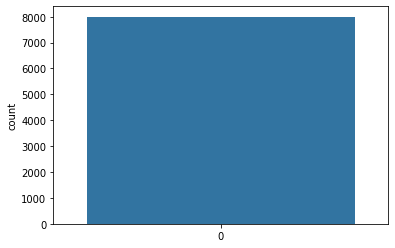

In [65]:
sns.countplot(new_df.score)
plt.show()

In [49]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    rating = int(rating)
    
    # Convert to class
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

# Apply to the dataset 
df_busu['sentiment'] = df_busu.score.apply(to_sentiment)

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (3).

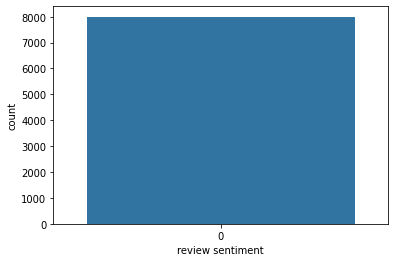

In [50]:
class_names = ['negative', 'neutral', 'positive']
ax = sns.countplot(df_busu.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)